# Extract single reads

Date: 23 Jan 2025

Using https://github.com/MichalRozenwald/epiCausality/blob/main/Extract_single_reads_%26_LR_2024Apr16.ipynb 
and https://github.com/MichalRozenwald/epiCausality/blob/main/gm12878_deepCTCF_updated_extract_reads.ipynb 

In [3]:
from dimelo import parse_bam, plot_enrichment_profile, plot_reads, load_processed, utils
import pysam
import platform

import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from matplotlib.axes import Axes
import numpy as np
import pandas as pd

print('System:',platform.system())
print('Release:',platform.release())
print('Version:',platform.version())
print('Processor:',platform.processor())

#  Pyton version
import sys
print(sys.version)
     

modkit found with expected version 0.2.4
System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]


In [4]:
ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta') #'./test/output/chm13.draft_v1.1.fasta')
ref_genome_v1_1_file

PosixPath('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')

In [90]:
import pysam

t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'

ref_seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162, 206586192) #t2t v11: 206586162,206586192)
# seq = pysam.FastaFile(ref_genome_v1_0_gm_path).fetch('chr1',206586331, 206586361) #t2t v11: 206586162,206586192)
print(ref_seq), print(len(seq))
ref_seq_list =  [s for s in ref_seq]
# plt.xticks(range(len(ref_seq_list)), ref_seq_list, size='small')

CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30


In [5]:
output_dir = Path("./dimelo_v2_output")
# Path('/content/drive/MyDrive/Michal Rozenwald/data/CD55/cas9_12ef_101923_misha/dimelo_new_package') # './test/output')

output_dir.mkdir(exist_ok=True)
output_dir

PosixPath('dimelo_v2_output')

In [6]:
! ls "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/"

align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam
chr1_sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam
chr1_sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam.bai
sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam
sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam.bai
summary_sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.tsv


In [7]:
unedited_bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"


In [8]:

# bam_path = unedited_bam_path
# threshold_mC=0.99

# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# window_size = None # 4000
# # window_size = 4000

# outname = f'cd55_window{window_size}'
# num_cores = 32

# cas9  = parse_bam.extract(
#     input_file=bam_path, # ctcf_bam_file_updated
#     output_name='cas9_12ef_101923_extract_chr1_206586162_206586192_ws4000_thresh09', # _ws4000 'ctcf_demo_extract',
#     ref_genome=ref_genome_v1_1_file, # ref_genome_file,
#     output_directory=output_dir,
#     regions =t2t_v1_1_cd55_30bps, # [cd55_interest_target_regions], # ctcf_target_regions,ctcf_off_target_regions],
#     motifs=['CG,0'], # ['A,0','CG,0'],
#     thresh=threshold_mC,  # 0.75, # 190,
#     window_size=window_size, # None,
#     # cores = 1, # uncomment this line if your process appears to be terminating early (reduces memory usage)
#     # quiet = True,
#     # cleanup = False,
#     # log=True,
# )

# unedited_failed_extract_file_ws4000, uunedited_failed_extract_regions_ws4000 = cas9
# unedited_failed_extract_file_ws4000

# plot_reads.plot_reads(
#     unedited_failed_extract_file_ws4000, # cas9,
#     "chr1:206586162-206586192", # bed_region,
#     ['CG,0'],
#     window_size = window_size,
#     sort_by = ['shuffle','strand'], # ['strand'], # ['shuffle','strand'],
#     # sort_by = ['shuffle', 'strand', 'region_start'], # ['shuffle','strand'],
#     s=1)
# plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
# # plt.title('cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam CpG extraction')

 


No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.99 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.…

          |    0%

          | Transferring 2925 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2925   0% | 00:00<…

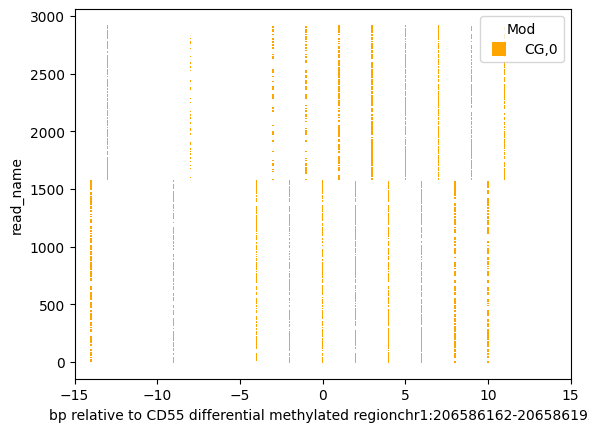

In [9]:
def extract_from_bam(bam_path, ref_genome_file, output_dir, 
                    window_size=None, threshold_mC=0.99, num_cores=32,
                    regions = 'chr1:206586162-206586192',
                    motifs=['CG,0'],
                    output_name='cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09',):
    """
    Processes a BAM file using the parse_bam.extract function and plots the extracted reads.

    Parameters:
        bam_path (str): Path to the input BAM file.
        ref_genome_file (str): Path to the reference genome file.
        output_dir (str): Directory to store output files.
        window_size (int, optional): Window size for extraction. Defaults to None.
        threshold_mC (float, optional): Threshold for methylation. Defaults to 0.99.
        num_cores (int, optional): Number of cores for processing. Defaults to 32.

    Returns:
        extract_file, extract_regions
    """

    extract_file, extract_regions  = parse_bam.extract(
        input_file=bam_path,
        output_name=output_name,
        ref_genome=ref_genome_file,
        output_directory=output_dir,
        regions=regions,
        motifs=motifs,
        thresh=threshold_mC,
        window_size=window_size,
    )

    plot_reads.plot_reads(
        extract_file,
        t2t_v1_1_cd55_30bps,
        motifs=motifs,
        window_size=window_size,
        sort_by=['shuffle', 'strand'],
        s=1
    )

    plt.xlabel('bp relative to CD55 differential methylated region' + str(regions) )
    plt.show()

    return(extract_file, extract_regions )


# Example usage
bam_path = unedited_bam_path
threshold_mC=0.99

window_size = None # 4000
# window_size = 4000

t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
regions = t2t_v1_1_cd55_30bps

motifs=['CG,0']
output_name='cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09'
# outname = f'cd55_window{window_size}'
num_cores = 32


extract_file, extract_regions = extract_from_bam(
    bam_path=unedited_bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    window_size=window_size,   # 4000,
    threshold_mC=threshold_mC,  # 0.99
    regions = regions,         # 'chr1:206586162-206586192',
    motifs=motifs,
    output_name=output_name, #'cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09',
)


No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.75 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.…

          |    0%

          | Transferring 2925 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2925   0% | 00:00<…

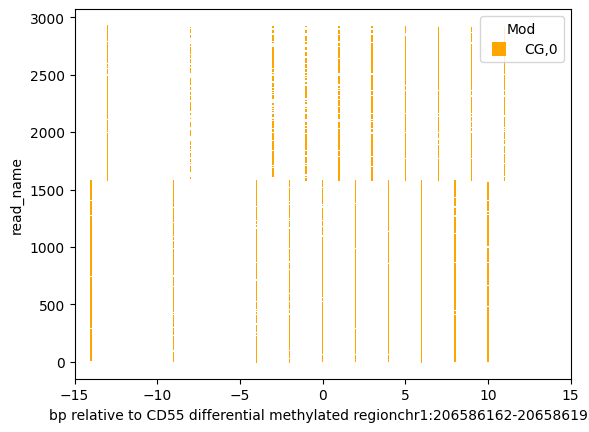

(PosixPath('dimelo_v2_output/cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09/reads.combined_basemods.h5'),
 PosixPath('dimelo_v2_output/cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09/regions.processed.bed'))

In [10]:

extract_from_bam(
    bam_path=unedited_bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    window_size=window_size, # 4000,
    threshold_mC= 0.75, # threshold_mC, #0.99
    regions = 'chr1:206586162-206586192',
    output_name='cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09',
)

In [11]:
extract_file, extract_regions

(PosixPath('dimelo_v2_output/cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09/reads.combined_basemods.h5'),
 PosixPath('dimelo_v2_output/cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09/regions.processed.bed'))

In [12]:
# ! python3 -m pip install biopython

In [13]:
# from Bio import SeqIO
# from collections import defaultdict
# import os

# def process_extracted_reads(extract_file, extract_regions, ref_genome_file, padding=100):
#     """
#     Processes extracted reads to generate padded reads and a DataFrame.

#     Parameters:
#         extract_file (str): Path to the extracted reads file.
#         extract_regions (str): Path to the extracted regions file.
#         ref_genome_file (str): Path to the reference genome file.
#         padding (int): Number of base pairs to pad around each region.

#     Returns:
#         padded_reads (dict): Dictionary with region identifiers as keys and padded read sequences as values.
#         padded_reads_df (pd.DataFrame): DataFrame containing details of the padded reads.
#     """
#     # Load reference genome
#     ref_genome = SeqIO.to_dict(SeqIO.parse(ref_genome_file, "fasta"))

#     # Initialize containers
#     padded_reads = {}
#     padded_reads_data = []

#     # Process each region
#     with open(extract_regions, 'r') as regions_file:
#         for line in regions_file:
#             chrom, start, end, region_id = line.strip().split()
#             start, end = int(start), int(end)

#             # Apply padding
#             padded_start = max(0, start - padding)
#             padded_end = end + padding

#             # Extract sequence
#             if chrom in ref_genome:
#                 sequence = ref_genome[chrom].seq[padded_start:padded_end]
#                 padded_reads[region_id] = str(sequence)
#                 padded_reads_data.append({
#                     'RegionID': region_id,
#                     'Chromosome': chrom,
#                     'Start': start,
#                     'End': end,
#                     'PaddedStart': padded_start,
#                     'PaddedEnd': padded_end,
#                     'Sequence': str(sequence)
#                 })
#             else:
#                 print(f"Chromosome {chrom} not found in reference genome.")

#     # Create DataFrame
#     padded_reads_df = pd.DataFrame(padded_reads_data)

#     return padded_reads, padded_reads_df

# # Example usage
# # extract_file = 'path/to/extract_file.txt'
# # extract_regions = 'path/to/extract_regions.txt'
# ref_genome_file = ref_genome_v1_1_file # 'path/to/ref_genome.fasta'

# padded_reads, padded_reads_df = process_extracted_reads(extract_file, extract_regions, ref_genome_file)

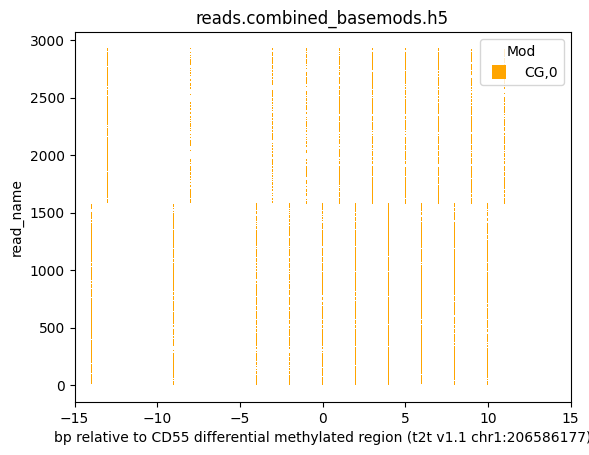

In [15]:
plot_reads.plot_reads(
    extract_file,
    t2t_v1_1_cd55_30bps, # "chr1:206586162-206586192", #bed_region,
    ['CG,0'],
    window_size = window_size, #4000,
    sort_by=['shuffle', 'strand'],

    # s=3
)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title(Path(extract_file).name)
plt.show()
     


In [37]:
# read_data_list, datasets, mods = load_processed.read_vectors_from_hdf5(
#               file=extract_file,
#               regions=regions,
#               motifs=motifs,
#               window_size=None, #window_size,
#           )
# # Print out the data from the first read
# for idx,dataset in enumerate(datasets):
#     print(dataset)
#     for read_data in read_data_list:
#         print('\t',read_data[idx])
#         break

# # # Convert data frame where each row represents a read to a data frame where each row represents a single modified position in a read
# # df = pd.DataFrame({
# #     'read_name': read_names,
# #     'mod': mods,
# #     'pos': reads
# # }).explode('pos')
# # axes = sns.scatterplot(
# #     data=df,
# #     x="pos",
# #     y="read_name",
# #     hue="mod",
# #     # palette=colors,
# #     s=1, #0.5,
# #     marker="s",
# #     linewidth=0,
# # )
# # # Retrieve the existing legend
# # legend = axes.legend_

# # # Update legend properties
# # if legend is not None:
# #     legend.set_title('Mod')
# #     for handle in legend.legendHandles:
# #         handle.set_markersize(10)  # Set a larger marker size for legend

# # # return axes
# # axes

In [28]:
read_data_list[:2]

[('chr1',
  array([False, False, False, ..., False, False, False]),
  'CG,0',
  np.int32(206589906),
  '70716b3a-2687-497e-aec2-2437dfefae48',
  np.int32(206580868),
  '-',
  array([False, False, False, ...,  True, False,  True]),
  206586162,
  206586192,
  '.',
  np.float64(0.0)),
 ('chr1',
  array([False, False, False, ..., False, False, False]),
  'CG,0',
  np.int32(206589923),
  '725648dd-2bba-438a-90af-ed194c97f6a6',
  np.int32(206582398),
  '-',
  array([False, False, False, ...,  True, False,  True]),
  206586162,
  206586192,
  '.',
  np.float64(0.1))]

# Using gm12878_deepCTCF_updated_extract_reads
 https://github.com/MichalRozenwald/epiCausality/blob/main/gm12878_deepCTCF_updated_extract_reads.ipynb 

In [39]:
extract_file

PosixPath('dimelo_v2_output/cas9_12ef_101923_extract_chr1_206586162_206586192_wsNone_thresh09/reads.combined_basemods.h5')

In [40]:
reads, read_names, mods, regions_dict = load_processed.readwise_binary_modification_arrays(
              file=extract_file,
              regions=regions,
              motifs=motifs,
              window_size=None, #window_size,
)
      # thresh = thresh,
      # relative = relative,
      # sort_by = sort_by,
    
# Convert data frame where each row represents a read to a data frame where each row represents a single modified position in a read
df = pd.DataFrame({
    'read_name': read_names,
    'mod': mods,
    'pos': reads
}).explode('pos')
df

,read_name,mod,pos
0,1,"CG,0",1
1,2,"CG,0",-8
2,3,"CG,0",11
3,4,"CG,0",-13
4,4,"CG,0",3
...,...,...,...
5780,2918,"CG,0",5
5781,2918,"CG,0",7
5782,2919,"CG,0",-13
5783,2922,"CG,0",5


In [41]:
len(np.unique(df['read_name']))

1639

In [42]:

df['pos_shifted'] = df['pos'] + 15
df

,read_name,mod,pos,pos_shifted
0,1,"CG,0",1,16
1,2,"CG,0",-8,7
2,3,"CG,0",11,26
3,4,"CG,0",-13,2
4,4,"CG,0",3,18
...,...,...,...,...
5780,2918,"CG,0",5,20
5781,2918,"CG,0",7,22
5782,2919,"CG,0",-13,2
5783,2922,"CG,0",5,20


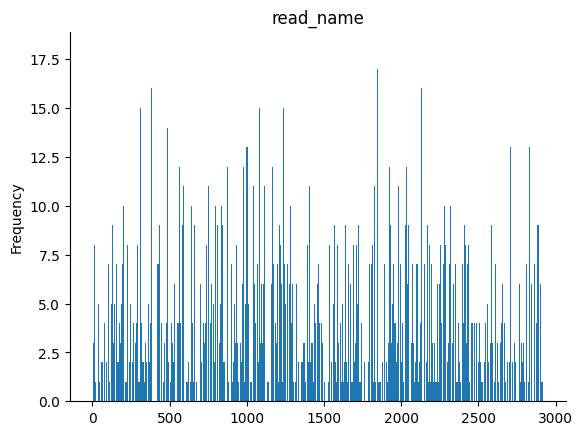

In [58]:
# @title read_name

from matplotlib import pyplot as plt
df['read_name'].plot(kind='hist', bins=1600, title='read_name')
plt.gca().spines[['top', 'right',]].set_visible(False)

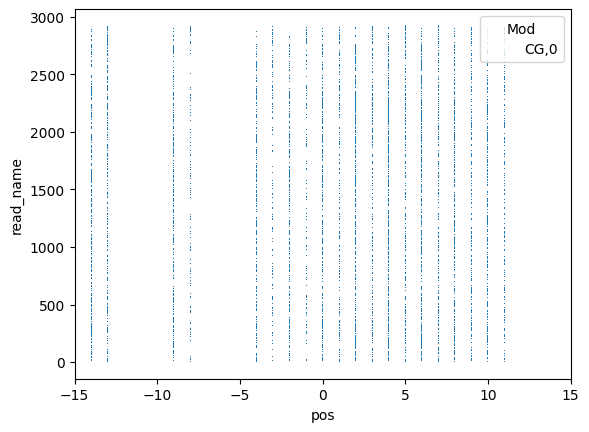

In [53]:
# Link to function https://github.com/streetslab/dimelo/blob/modkit_parsing_beta/dimelo/plot_reads.py#L56C1-L79C22

# mod_file_name = Path(mod_file_name)
# bed_file_name = Path(bed_file_name)
size = 0.5 # kwargs.pop('s', 0.5)

# palette = kwargs.pop('palette', {})

# merged_palette = {**utils.DEFAULT_COLORS, **palette}

axes = sns.scatterplot(
    data=df,
    x="pos",
    y="read_name",
    hue="mod",
    # palette=colors,
    s=size,
    marker="s",
    linewidth=0,
    # palette = merged_palette,
    # **kwargs
)
# Retrieve the existing legend
legend = axes.legend_
# legend = axes.get_legend

# Update legend properties
if legend is not None:
    legend.set_title('Mod')
    # for handle in legend.legendHandles:
    #     handle.set_markersize(10)  # Set a larger marker size for legend

relative = True
if relative:
    region1_start,region1_end,_ = next(iter(regions_dict.values()))[0]
    effective_window_size = (region1_end-region1_start)//2
    axes.set_xlim([-effective_window_size,effective_window_size])

# return axes

In [59]:
df.groupby("read_name").count() #["pos"].count()

,mod,pos,pos_shifted
read_name,,,
1,1,1,1
2,1,1,1
3,1,1,1
4,3,3,3
5,2,2,2
...,...,...,...
2916,1,1,1
2917,1,1,1
2918,4,4,4


In [56]:
len(read_names), len(np.unique(df['read_name']))

(5785, 1639)

In [57]:
read_names_unique = np.unique(df['read_name'])
num_reads = len(read_names_unique)
num_reads

1639

In [62]:
read_names_unique

array([   1,    2,    3, ..., 2918, 2919, 2922])

In [60]:
reads_dict_nums = dict(enumerate(read_names_unique))
reads_dict_nums

{0: np.int64(1),
 1: np.int64(2),
 2: np.int64(3),
 3: np.int64(4),
 4: np.int64(5),
 5: np.int64(6),
 6: np.int64(7),
 7: np.int64(9),
 8: np.int64(12),
 9: np.int64(13),
 10: np.int64(14),
 11: np.int64(16),
 12: np.int64(21),
 13: np.int64(22),
 14: np.int64(23),
 15: np.int64(24),
 16: np.int64(28),
 17: np.int64(32),
 18: np.int64(34),
 19: np.int64(35),
 20: np.int64(36),
 21: np.int64(38),
 22: np.int64(39),
 23: np.int64(41),
 24: np.int64(44),
 25: np.int64(45),
 26: np.int64(47),
 27: np.int64(48),
 28: np.int64(50),
 29: np.int64(54),
 30: np.int64(55),
 31: np.int64(56),
 32: np.int64(59),
 33: np.int64(61),
 34: np.int64(64),
 35: np.int64(65),
 36: np.int64(69),
 37: np.int64(70),
 38: np.int64(73),
 39: np.int64(76),
 40: np.int64(78),
 41: np.int64(80),
 42: np.int64(81),
 43: np.int64(82),
 44: np.int64(83),
 45: np.int64(88),
 46: np.int64(89),
 47: np.int64(90),
 48: np.int64(92),
 49: np.int64(93),
 50: np.int64(95),
 51: np.int64(101),
 52: np.int64(102),
 53: np.i

In [61]:
reads_dict = dict()

for i in range(len(read_names_unique)):
  reads_dict[read_names_unique[i]] = i
reads_dict

{np.int64(1): 0,
 np.int64(2): 1,
 np.int64(3): 2,
 np.int64(4): 3,
 np.int64(5): 4,
 np.int64(6): 5,
 np.int64(7): 6,
 np.int64(9): 7,
 np.int64(12): 8,
 np.int64(13): 9,
 np.int64(14): 10,
 np.int64(16): 11,
 np.int64(21): 12,
 np.int64(22): 13,
 np.int64(23): 14,
 np.int64(24): 15,
 np.int64(28): 16,
 np.int64(32): 17,
 np.int64(34): 18,
 np.int64(35): 19,
 np.int64(36): 20,
 np.int64(38): 21,
 np.int64(39): 22,
 np.int64(41): 23,
 np.int64(44): 24,
 np.int64(45): 25,
 np.int64(47): 26,
 np.int64(48): 27,
 np.int64(50): 28,
 np.int64(54): 29,
 np.int64(55): 30,
 np.int64(56): 31,
 np.int64(59): 32,
 np.int64(61): 33,
 np.int64(64): 34,
 np.int64(65): 35,
 np.int64(69): 36,
 np.int64(70): 37,
 np.int64(73): 38,
 np.int64(76): 39,
 np.int64(78): 40,
 np.int64(80): 41,
 np.int64(81): 42,
 np.int64(82): 43,
 np.int64(83): 44,
 np.int64(88): 45,
 np.int64(89): 46,
 np.int64(90): 47,
 np.int64(92): 48,
 np.int64(93): 49,
 np.int64(95): 50,
 np.int64(101): 51,
 np.int64(102): 52,
 np.int64

In [63]:
padded_reads = np.zeros([num_reads, 30])
padded_reads

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
padded_reads.shape


(1639, 30)

In [65]:
# SWITCH TO Nans -> to distriguish empty values from unmethylated
padded_reads = padded_reads + np.nan
padded_reads.shape, padded_reads

((1639, 30),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]))

In [66]:

for i in range(len(df['read_name'])):
  # df['pos_shifted']:
  padded_reads[reads_dict[df['read_name'][i]], df['pos_shifted'][i]] = 1
padded_reads

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [72]:
i = 0
reads_dict[df['read_name'][i]],

(0,)

In [74]:
df['read_name'][i]

np.int64(1)

In [75]:
padded_reads[reads_dict[df['read_name'][i]]]


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [76]:
df[df["read_name"] == df['read_name'][i]]

,read_name,mod,pos,pos_shifted
0,1,"CG,0",1,16


In [77]:
df["read_name"] 

0          1
1          2
2          3
3          4
4          4
        ... 
5780    2918
5781    2918
5782    2919
5783    2922
5784    2922
Name: read_name, Length: 5785, dtype: int64

In [78]:
padded_reads


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

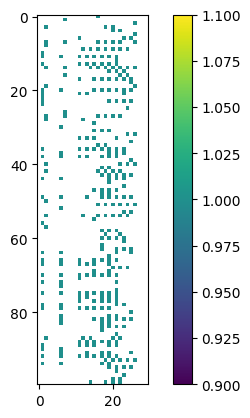

In [82]:

plt.imshow(padded_reads[:100]) # np.random.random((50,50)))
plt.colorbar()
plt.show()

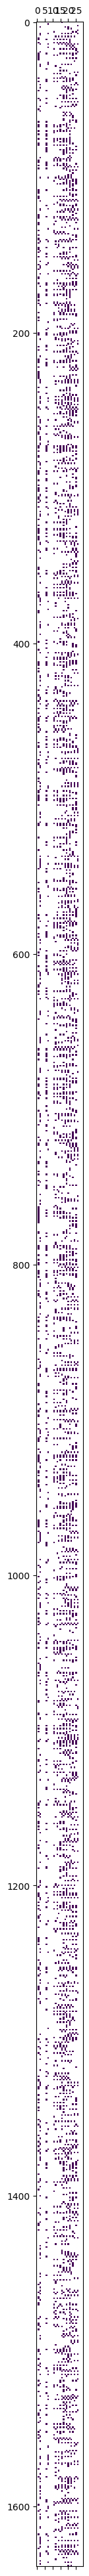

In [80]:


plt.figure(figsize=(10,50))
plt.matshow(padded_reads, fignum=1)


In [83]:
padded_reads_df = pd.DataFrame(padded_reads)
padded_reads_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
padded_reads_df.columns = seq_list
padded_reads_df

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
padded_reads_df.describe()

,C,C,G,C,C,C,C,G,A,G,...,G,C,G,C,G,C,G,C,A,C
count,0.0,382.0,317.0,0.0,0.0,0.0,313.0,112.0,0.0,0.0,...,280.0,469.0,270.0,357.0,231.0,332.0,194.0,0.0,0.0,0.0
mean,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
std,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
min,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
25%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
50%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
75%,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
max,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


In [93]:
# Save mC profiles np.ARRAY!
padded_reads.shape, padded_reads

((1639, 30),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]))

In [94]:
output_dir

PosixPath('dimelo_v2_output')

In [96]:
save_folder_path = output_dir # + "etracted_reads"
save_folder_path

PosixPath('dimelo_v2_output')

In [97]:
threshold_mC

0.99

In [98]:
bam_path

'/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [99]:
# cd55_30pbRIO_padded_reads.npy
# TODO: add info, dates, path
save_name = "deepCTCF_thresh" + str(threshold_mC) + "_cd55_30pbRIO_padded_reads" 
save_name_np = save_name + ".npy"

np.save(Path(save_folder_path, save_name_np), padded_reads)

Path(save_folder_path, save_name_np) 

PosixPath('dimelo_v2_output/deepCTCF_thresh0.99_cd55_30pbRIO_padded_reads.npy')